<a href="https://colab.research.google.com/github/sofiaarbasetti/CalculoNumericoIBM-1/blob/main/MetodosNumericos-Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Parcial 1
### Métodos Numéricos, IBM 2021
### Arbasetti Sofía

In [2]:
import matplotlib.pyplot as plt
import sympy as sp
from sympy.plotting import plot
import pandas as pd
import math
import numpy as np


x = sp.symbols('x')

In [3]:
# DEFINICIÓN DEL METODO BISECCION

def MetodoBiseccion(funcion= 2*x**2 - 6*x, a=1, b=10, tol=0.00000001, Nmax=60):
  valores_a = [0] # Van guardando los valores de de las variables en cada iteración
  valores_b = [0]
  valores_c = [0]
  valores_fc = [0]
  contador = 0
  while (funcion.subs(x,a)*funcion.subs(x,b)< 0):
    contador = contador + 1
    if (contador>Nmax):
        print('Se alcanzo la cantidad maxima de iteraciones')
        break
    c= (a+b)/2
    valores_a.append(a)
    valores_b.append(b)
    valores_c.append(c)
    valores_fc.append(funcion.subs(x,c))
    datos = {
        'a' : valores_a,
        'b' : valores_b,
        'c' : valores_c,
        'fc': valores_fc
        }
    df = pd.DataFrame(datos)
    df.head()
    if (funcion.subs(x,a)*funcion.subs(x,c)== 0): # Se halla la raiz exacta, valor de c en el cual la función vale 0 
      print ("La raíz es: ", c)
      print ("Se halló la raíz en la iteración N°", contador, 'con una tolerancia = ', tol)
      print(df)
      break
    elif (abs(valores_c [contador-1]-valores_c [contador-2])<=tol):  # Teniendo en cuenta el error, se halla la raiz aproximada
      print ("La raíz es: ", c)
      print ("Se halló la raíz en la iteración N°", contador, 'con una tolerancia = ', tol)
      break
    elif (funcion.subs(x,a)*funcion.subs(x,c)< 0):  # b toma el valor de c si hay un cambio de signo entre la evaluación en a y c (porque quiere decir que c se encuentra del lado derecho de la raíz)
      b=c
    else:
      a=c # a toma el valor de c cuando NO hay un cambio de signo entre la evaluación en a y c (porque quiere decir que c se encuentra del mismo lado respecto de la raíz)
  print ("Salió del bucle")
  #Grafico de error
  X = np.linspace(0,contador, len(valores_c))
  plt.plot(X, valores_c, 'r', label='c')
  plt.legend(loc='upper right')
  plt.title('Grafico de Error')
  plt.ylabel('Valores de c')
  plt.xlabel('Iteraciones')
  plt.grid(True)
  plt.show()


In [91]:
# DEFINICIÓN DEL METODO PUNTO FIJO
def MetodoPuntoFijo (p0 = 1, tol = 0.01, Nmax = 100):
  contadorN = 1
  valores_p = [p0]
  error = []
  while contadorN <= Nmax:
    p = funcion_g(p0)
    c = abs(p-p0)
    valores_p.append(p)
    error.append(c)
    
    if abs(p-p0) < tol:
        print('El valor de p es: {0:.5f}'.format(p))
        print('Tolerancia:',tol,' Iteraciones: {}'.format(contadorN))
        print('La función g evaluada en p es: ', funcion_g(p))
        break
    
    else:
        contadorN += 1
        p0 = p
        if contadorN == Nmax:
            print('No se halló la raiz') 

  #Grafico error
  lenght = len(error)
  X = np.linspace(0, lenght, lenght)
  plt.plot(X, error, 'r', label='c')
  plt.legend(loc='upper right')
  plt.title('Grafico de Error')
  plt.ylabel('Valores de C=p-p0')
  plt.xlabel('Iteraciones')
  plt.grid(True)
  plt.show()
    

In [4]:
# DEFINICIÓN DEL METODO NEWTON 
def MetodoNewton(funcion= x**3-4*x**2-10, p0=3, tol=0.00001, Nmax=10):
  deriv= sp.diff(funcion)
  i=0
  valores_p = []
  print('La tolerancia definida es ',tol)
  while (i <= Nmax) :
    p= p0-(funcion.subs(x,p0)/deriv.subs(x,p0))
    valores_p.append(p)
    if (abs(p-p0)<= tol):
      print('Se halló el valor de p= ', round(p,15),' en la iteración N°', i)
      break
    else:
      i = i+1
      p0= p
      if (i>Nmax):
        print('Se alcanzo la cantidad maxima de iteraciones')
   #Grafico de error
  X = np.linspace(0,i, len(valores_p))
  #Plot funciones
  plt.plot(X, valores_p, 'r', label='p')
  plt.legend(loc='upper right')
  plt.title('Grafico de Error')
  plt.ylabel('Valores de p')
  plt.xlabel('Iteraciones')
  plt.grid(True)
  plt.show()

# 1) f(x) = x**2 - 4


In [93]:
f1 = x**2 - 4

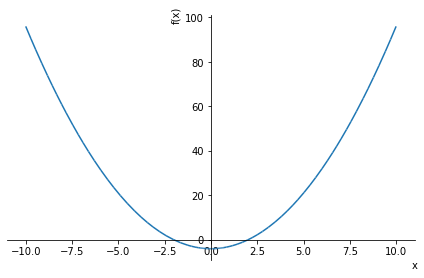

[-2, 2]

In [5]:
# Gráficamente
p1 = plot(f1, show=True)

#Raíces reales (utilizadas para comprobar los resultados de los métodos)
sp.roots(f1, multiple=True)

### 1-a) Método Bisección

In [ ]:
# Metodo Bisección- RAIZ 1
  # Tol= 10e-2
MetodoBiseccion(funcion= f1, a=0, b=5, tol=1e-2)
 # Tol= 10e-5
MetodoBiseccion(funcion= f1, a=0, b=5, tol=1e-5)
  # Tol= 10e-7
MetodoBiseccion(funcion= f1, a=0, b=5, tol=1e-7)
  # Tol= 10e-12
MetodoBiseccion(funcion= f1, a=0, b=5, tol=1e-12)

In [7]:
# Metodo Bisección- RAIZ 2
  # Tol= 10e-2
MetodoBiseccion(funcion= f1, a=-5, b=0, tol=1e-2)
  # Tol= 10e-5
MetodoBiseccion(funcion= f1, a=-5, b=0, tol=1e-5)
  # Tol= 10e-7
MetodoBiseccion(funcion= f1, a=-5, b=0, tol=1e-7)
  # Tol= 10e-12
MetodoBiseccion(funcion= f1, a=-5, b=0, tol=1e-12)

La raíz es:  -1.9970703125
Se halló la raíz en la iteración N° 10
Salió del bucle
La raíz es:  -2.000002861022949
Se halló la raíz en la iteración N° 20
Salió del bucle
La raíz es:  -1.9999999925494194
Se halló la raíz en la iteración N° 27
Salió del bucle
La raíz es:  -2.0000000000001705
Se halló la raíz en la iteración N° 44
Salió del bucle


### 1-b) Método Punto Fijo

In [85]:
def funcion_g(x):
    return math.sqrt(4) #Al despejar no se tiene en cuenta que se debe dejar a x en módulo (+/-) al quitar el exponente 2 (par)--->obtengo el valor absoluto 
#Podría definirse g(x)= -math.sqrt(4) siendo también válido y obteniendo la raíz faltante.

El valor de p es: 2.00000
Tolerancia: 0.1  Iteraciones: 2
La función g evaluada en p es:  2.0


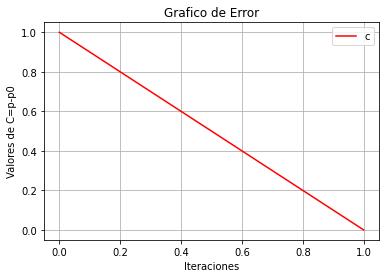

El valor de p es: 2.00000
Tolerancia: 0.0001  Iteraciones: 2
La función g evaluada en p es:  2.0


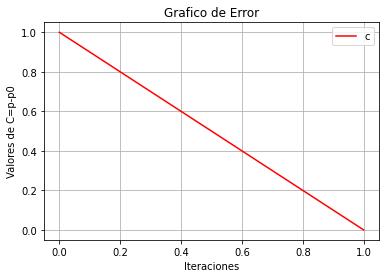

El valor de p es: 2.00000
Tolerancia: 1e-06  Iteraciones: 2
La función g evaluada en p es:  2.0


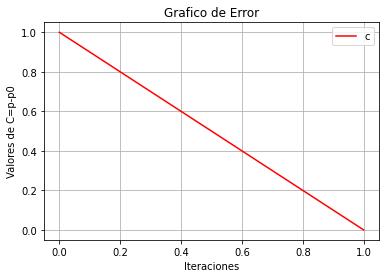

El valor de p es: 2.00000
Tolerancia: 1e-11  Iteraciones: 2
La función g evaluada en p es:  2.0


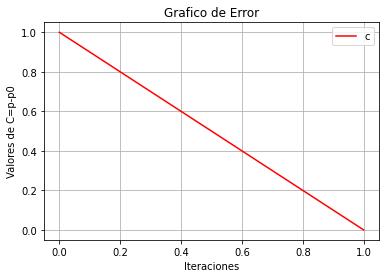

In [88]:
# Método Punto Fijo- RAIZ 1
  # Tol= 10e-2
MetodoPuntoFijo(p0=1, tol=10e-2)
  # Tol= 10e-5
MetodoPuntoFijo(p0=1, tol=10e-5)
  # Tol= 10e-7
MetodoPuntoFijo(p0=1, tol=10e-7)
  # Tol= 10e-12
MetodoPuntoFijo(p0=1, tol=10e-12)

In [43]:
# Método Punto Fijo- RAIZ 2
  # Tol= 10e-2
MetodoPuntoFijo(p0=-3, tol=10e-2)
  # Tol= 10e-5
MetodoPuntoFijo(p0=-3, tol=10e-5)
  # Tol= 10e-7
MetodoPuntoFijo(p0=-3, tol=10e-7)
  # Tol= 10e-12
MetodoPuntoFijo(p0=-3, tol=10e-12)

El valor de p es: 2.00000
Tolerancia: 0.1  Iteraciones: 2
La función g evaluada en p es:  2.0
El valor de p es: 2.00000
Tolerancia: 0.0001  Iteraciones: 2
La función g evaluada en p es:  2.0
El valor de p es: 2.00000
Tolerancia: 1e-06  Iteraciones: 2
La función g evaluada en p es:  2.0
El valor de p es: 2.00000
Tolerancia: 1e-11  Iteraciones: 2
La función g evaluada en p es:  2.0


### 1-c) Método Newton

In [ ]:
# Método Newton- RAIZ 1
  # Tol= 10e-2
MetodoNewton(funcion=f1,p0=1, tol=10e-2)
  # Tol= 10e-5
MetodoNewton(funcion=f1,p0=1, tol=10e-5)
  # Tol= 10e-7
MetodoNewton(funcion=f1,p0=1, tol=10e-7)
  # Tol= 10e-12
MetodoNewton(funcion=f1,p0=1, tol=10e-12)

In [ ]:
# Método Newton- RAIZ 2
  # Tol= 10e-2
MetodoNewton(funcion=f1,p0=-3, tol=10e-2)
  # Tol= 10e-5
MetodoNewton(funcion=f1,p0=-3, tol=10e-5)
  # Tol= 10e-7
MetodoNewton(funcion=f1,p0=-3, tol=10e-7)
  # Tol= 10e-12
MetodoNewton(funcion=f1,p0=-3, tol=10e-12)

Ya que la función g(x) en este caso es una constante, no hay error a la hora de iterar, cualquier valor que se pase por parámetro va a devolver dicha constante porque no va a influir en la función g.

# 2) f(x) = -0.5*xe2 + 2.5* x + 4.5

In [96]:
f2 = -0.5* x**2 + 2.5* x + 4.5

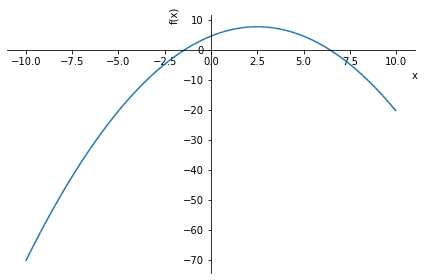

[-1.40512483795333, 6.40512483795333]

In [11]:
# Gráficamente
p2 = plot(f2, show=True)

#Raíces reales
sp.roots(f2, multiple=True)

### 2-a) Método Bisección

In [12]:
# Metodo Bisección- RAIZ 1
  # Tol= 10e-2
MetodoBiseccion(funcion= f2, a=-2.5, b=0, tol=1e-2)
  # Tol= 10e-2
MetodoBiseccion(funcion= f2, a=-2.5, b=0, tol=1e-5)
  # Tol= 10e-2
MetodoBiseccion(funcion= f2, a=-2.5, b=0, tol=1e-7)
  # Tol= 10e-2
MetodoBiseccion(funcion= f2, a=-2.5, b=0, tol=1e-12)

La raíz es:  -1.4013671875
Se halló la raíz en la iteración N° 9
Salió del bucle
La raíz es:  -1.4051294326782227
Se halló la raíz en la iteración N° 19
Salió del bucle
La raíz es:  -1.4051248505711555
Se halló la raíz en la iteración N° 26
Salió del bucle
La raíz es:  -1.4051248379533376
Se halló la raíz en la iteración N° 43
Salió del bucle


In [13]:
# Metodo Bisección- RAIZ 2
  # Tol= 10e-2
MetodoBiseccion(funcion= f2, a=5, b=8, tol=1e-2)
  # Tol= 10e-2
MetodoBiseccion(funcion= f2, a=5, b=8, tol=1e-5)
  # Tol= 10e-2
MetodoBiseccion(funcion= f2, a=5, b=8, tol=1e-7)
  # Tol= 10e-2
MetodoBiseccion(funcion= f2, a=5, b=8, tol=1e-12)

La raíz es:  6.4033203125
Se halló la raíz en la iteración N° 10
Salió del bucle
La raíz es:  6.405125617980957
Se halló la raíz en la iteración N° 20
Salió del bucle
La raíz es:  6.405124858021736
Se halló la raíz en la iteración N° 26
Salió del bucle
La raíz es:  6.4051248379533945
Se halló la raíz en la iteración N° 43
Salió del bucle


### 2-b) Metodo Punto Fijo

In [89]:
def funcion_g(x):
    return -4.5/(-0.5*x+2.5)

In [ ]:
# Método Punto Fijo- RAIZ 1
  # Tol= 10e-2
MetodoPuntoFijo(p0=-2.5, tol=10e-2)
  # Tol= 10e-5
MetodoPuntoFijo(p0=-2.5, tol=10e-5)
  # Tol= 10e-7
MetodoPuntoFijo(p0=-2.5, tol=10e-7)
  # Tol= 10e-12
MetodoPuntoFijo(p0=-2.5, tol=10e-12)

In [49]:
# Método Punto Fijo- RAIZ 2
#El método no logra identificar la segunda raiz, sino que vuelve a devolver la anterior independientemente del p0 que se pase por parámetro
  # Tol= 10e-2
MetodoPuntoFijo(p0=6, tol=10e-2)
  # Tol= 10e-5
MetodoPuntoFijo(p0=6, tol=10e-5)
  # Tol= 10e-7
MetodoPuntoFijo(p0=6, tol=10e-7)
  # Tol= 10e-12
MetodoPuntoFijo(p0=6, tol=10e-12)

El valor de p es: -1.38924
Tolerancia: 0.1  Iteraciones: 7
La función g evaluada en p es:  -1.408617155815272
El valor de p es: -1.40513
Tolerancia: 0.0001  Iteraciones: 11
La función g evaluada en p es:  -1.405123064351705
El valor de p es: -1.40512
Tolerancia: 1e-06  Iteraciones: 14
La función g evaluada en p es:  -1.4051248566781671
El valor de p es: -1.40512
Tolerancia: 1e-11  Iteraciones: 22
La función g evaluada en p es:  -1.4051248379534276


### 2-c) Método Newton

In [ ]:
# Método Newton- RAIZ 1
  # Tol= 10e-2
MetodoNewton(funcion=f2, p0=-2.5, tol=10e-2)
  # Tol= 10e-5
MetodoNewton(funcion=f2, p0=-2.5, tol=10e-5)
  # Tol= 10e-7
MetodoNewton(funcion=f2, p0=-2.5, tol=10e-7)
  # Tol= 10e-12
MetodoNewton(funcion=f2, p0=-2.5, tol=10e-12)

In [ ]:
# Método Newton- RAIZ 2
  # Tol= 10e-2
MetodoNewton(funcion=f2,p0=5, tol=10e-2)
  # Tol= 10e-5
MetodoNewton(funcion=f2,p0=5, tol=10e-5)
  # Tol= 10e-7
MetodoNewton(funcion=f2,p0=5, tol=10e-7)
  # Tol= 10e-12
MetodoNewton(funcion=f2,p0=5, tol=10e-12)

# 3) f(x) = xe3 -13*x-12 

In [19]:
f3 = x**3 -13*x-12 

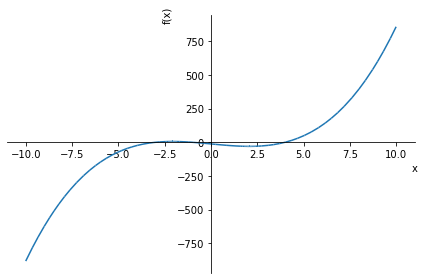

[-3, -1, 4]

In [20]:
# Gráficamente
p3 = plot(f3, show=True)

#Raíces reales
sp.roots(f3, multiple=True)

### 3-a) Método Bisección

In [21]:
# Metodo Bisección- RAIZ 1
  # Tol= 10e-2
MetodoBiseccion(funcion= f3, a=-5, b=-2.5, tol=1e-2)
  # Tol= 10e-2
MetodoBiseccion(funcion= f3, a=-5, b=-2.5, tol=1e-5)
  # Tol= 10e-2
MetodoBiseccion(funcion= f3, a=-5, b=-2.5, tol=1e-7)
  # Tol= 10e-2
MetodoBiseccion(funcion= f3, a=-5, b=-2.5, tol=1e-12)

La raíz es:  -3.0029296875
Se halló la raíz en la iteración N° 9
Salió del bucle
La raíz es:  -2.999997138977051
Se halló la raíz en la iteración N° 19
Salió del bucle
La raíz es:  -3.0000000074505806
Se halló la raíz en la iteración N° 26
Salió del bucle
La raíz es:  -2.9999999999998295
Se halló la raíz en la iteración N° 43
Salió del bucle


In [22]:
# Metodo Bisección- RAIZ 2
  # Tol= 10e-2
MetodoBiseccion(funcion= f3, a=-2.5, b=0, tol=1e-2)
  # Tol= 10e-2
MetodoBiseccion(funcion= f3, a=-2.5, b=0, tol=1e-5)
  # Tol= 10e-2
MetodoBiseccion(funcion= f3, a=-2.5, b=0, tol=1e-7)
  # Tol= 10e-2
MetodoBiseccion(funcion= f3, a=-2.5, b=0, tol=1e-12)

La raíz es:  -1.0009765625
Se halló la raíz en la iteración N° 9
Salió del bucle
La raíz es:  -0.9999990463256836
Se halló la raíz en la iteración N° 19
Salió del bucle
La raíz es:  -0.9999999776482582
Se halló la raíz en la iteración N° 26
Salió del bucle
La raíz es:  -0.9999999999999432
Se halló la raíz en la iteración N° 43
Salió del bucle


In [23]:
# Metodo Bisección- RAIZ 3
  # Tol= 10e-2
MetodoBiseccion(funcion= f3, a=2.5, b=5, tol=1e-2)
  # Tol= 10e-2
MetodoBiseccion(funcion= f3, a=2.5, b=5, tol=1e-5)
  # Tol= 10e-2
MetodoBiseccion(funcion= f3, a=2.5, b=5, tol=1e-7)
  # Tol= 10e-2
MetodoBiseccion(funcion= f3, a=2.5, b=5, tol=1e-12)

La raíz es:  3.9990234375
Se halló la raíz en la iteración N° 9
Salió del bucle
La raíz es:  4.000000953674316
Se halló la raíz en la iteración N° 19
Salió del bucle
La raíz es:  4.000000022351742
Se halló la raíz en la iteración N° 26
Salió del bucle
La raíz es:  4.000000000000057
Se halló la raíz en la iteración N° 43
Salió del bucle


### 3-b) Metodo Punto Fijo

In [54]:
def funcion_g(x):
    return 12/(x**2-13)

El método logra identificar solo 1 raiz (x=-1), solo reconoce las otras 2 raices si se pasan exactas como parámetro p0

In [60]:
# Método Punto Fijo- RAIZ 1
  # Tol= 10e-2
MetodoPuntoFijo(p0=-5, tol=10e-2)
  # Tol= 10e-5
MetodoPuntoFijo(p0=-5, tol=10e-5)
  # Tol= 10e-7
MetodoPuntoFijo(p0=-5, tol=10e-7)
  # Tol= 10e-12
MetodoPuntoFijo(p0=-5, tol=10e-12)

El valor de p es: -0.99083
Tolerancia: 0.1  Iteraciones: 3
La función g evaluada en p es:  -0.9984805267792243
El valor de p es: -1.00000
Tolerancia: 0.0001  Iteraciones: 3
La función g evaluada en p es:  -1.0
El valor de p es: -1.00000
Tolerancia: 1e-06  Iteraciones: 3
La función g evaluada en p es:  -1.0
El valor de p es: -1.00000
Tolerancia: 1e-11  Iteraciones: 3
La función g evaluada en p es:  -1.0


In [68]:
# Método Punto Fijo- RAIZ 2
#El método no logra identificar la segunda raiz, sino que vuelve a devolver la anterior independientemente del p0 que se pase por parámetro
  # Tol= 10e-2
MetodoPuntoFijo(p0=-3, tol=10e-2)
  # Tol= 10e-5
MetodoPuntoFijo(p0=-2, tol=10e-5)
  # Tol= 10e-7
MetodoPuntoFijo(p0=-2, tol=10e-7)
  # Tol= 10e-12
MetodoPuntoFijo(p0=-2, tol=10e-12)

El valor de p es: -3.00000
Tolerancia: 0.1  Iteraciones: 1
La función g evaluada en p es:  -3.0
El valor de p es: -1.00001
Tolerancia: 0.0001  Iteraciones: 7
La función g evaluada en p es:  -1.000001570695104
El valor de p es: -1.00000
Tolerancia: 1e-06  Iteraciones: 10
La función g evaluada en p es:  -1.0000000072717457
El valor de p es: -1.00000
Tolerancia: 1e-11  Iteraciones: 16
La función g evaluada en p es:  -1.0000000000001559


In [67]:
# Método Punto Fijo- RAIZ 3
#El método no logra identificar la segunda raiz, sino que vuelve a devolver la anterior independientemente del p0 que se pase por parámetro
  # Tol= 10e-2
MetodoPuntoFijo(p0=4, tol=10e-2)
  # Tol= 10e-5
MetodoPuntoFijo(p0=2.5, tol=10e-5)
  # Tol= 10e-7
MetodoPuntoFijo(p0=2.5, tol=10e-7)
  # Tol= 10e-12
MetodoPuntoFijo(p0=2.5, tol=10e-12)

El valor de p es: 4.00000
Tolerancia: 0.1  Iteraciones: 1
La función g evaluada en p es:  4.0
El valor de p es: -1.00001
Tolerancia: 0.0001  Iteraciones: 8
La función g evaluada en p es:  -1.000000938698319
El valor de p es: -1.00000
Tolerancia: 1e-06  Iteraciones: 10
La función g evaluada en p es:  -1.0000000260749724
El valor de p es: -1.00000
Tolerancia: 1e-11  Iteraciones: 17
La función g evaluada en p es:  -1.000000000000093


### 3-c) Método Newton

In [ ]:
# Método Newton- RAIZ 1
  # Tol= 10e-2
MetodoNewton(funcion=f3, p0=-5, tol=10e-2)
  # Tol= 10e-5
MetodoNewton(funcion=f3, p0=-5, tol=10e-5)
  # Tol= 10e-7
MetodoNewton(funcion=f3, p0=-5, tol=10e-7)
  # Tol= 10e-12
MetodoNewton(funcion=f3, p0=-5, tol=10e-12)

In [ ]:
# Método Newton- RAIZ 2
  # Tol= 10e-2
MetodoNewton(funcion=f3, p0=-1.5, tol=10e-2)
  # Tol= 10e-5
MetodoNewton(funcion=f3, p0=-1.5, tol=10e-5)
  # Tol= 10e-7
MetodoNewton(funcion=f3, p0=-1.5, tol=10e-7)
  # Tol= 10e-12
MetodoNewton(funcion=f3, p0=-1.5, tol=10e-12)

In [ ]:
# Método Newton- RAIZ 3
  # Tol= 10e-2
MetodoNewton(funcion=f3, p0=2.5, tol=10e-2)
  # Tol= 10e-5
MetodoNewton(funcion=f3, p0=2.5, tol=10e-5)
  # Tol= 10e-7
MetodoNewton(funcion=f3, p0=2.5, tol=10e-7)
  # Tol= 10e-12
MetodoNewton(funcion=f3, p0=2.5, tol=10e-12)

# 4) f(x) = -25 + 82*x +90*xe2 + 44*xe3 -8*xe4

In [6]:
f4 = -25 + 82*x +90* x**2 +44* x**3 -8*x**4

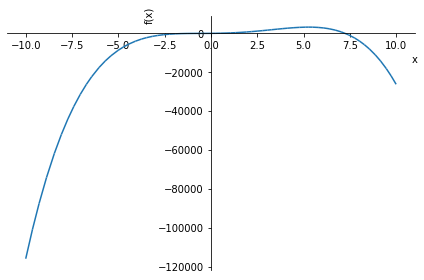

[11/8 + sqrt(-9/(32*(12777/512 + 3*sqrt(18139162)/512)**(1/3)) + 2*(12777/512 + 3*sqrt(18139162)/512)**(1/3) + 241/16)/2 + sqrt(-2*(12777/512 + 3*sqrt(18139162)/512)**(1/3) + 9/(32*(12777/512 + 3*sqrt(18139162)/512)**(1/3)) + 3967/(32*sqrt(-9/(32*(12777/512 + 3*sqrt(18139162)/512)**(1/3)) + 2*(12777/512 + 3*sqrt(18139162)/512)**(1/3) + 241/16)) + 241/8)/2,
 -sqrt(-9/(32*(12777/512 + 3*sqrt(18139162)/512)**(1/3)) + 2*(12777/512 + 3*sqrt(18139162)/512)**(1/3) + 241/16)/2 + 11/8 - sqrt(-3967/(32*sqrt(-9/(32*(12777/512 + 3*sqrt(18139162)/512)**(1/3)) + 2*(12777/512 + 3*sqrt(18139162)/512)**(1/3) + 241/16)) - 2*(12777/512 + 3*sqrt(18139162)/512)**(1/3) + 9/(32*(12777/512 + 3*sqrt(18139162)/512)**(1/3)) + 241/8)/2,
 -sqrt(-9/(32*(12777/512 + 3*sqrt(18139162)/512)**(1/3)) + 2*(12777/512 + 3*sqrt(18139162)/512)**(1/3) + 241/16)/2 + 11/8 + sqrt(-3967/(32*sqrt(-9/(32*(12777/512 + 3*sqrt(18139162)/512)**(1/3)) + 2*(12777/512 + 3*sqrt(18139162)/512)**(1/3) + 241/16)) - 2*(12777/512 + 3*sqrt(181391

In [7]:
# Gráficamente
p4 = plot(f4, show=True)

#Raíces reales
sp.roots(f4, multiple=True)

In [2]:
raiz_real1= 11/8 + math.sqrt(-9/(32*(12777/512 + 3*math.sqrt(18139162)/512)**(1/3)) + 2*(12777/512 + 3*math.sqrt(18139162)/512)**(1/3) + 241/16)/2 + math.sqrt(-2*(12777/512 + 3*math.sqrt(18139162)/512)**(1/3) + 9/(32*(12777/512 + 3*math.sqrt(18139162)/512)**(1/3)) + 3967/(32*math.sqrt(-9/(32*(12777/512 + 3*math.sqrt(18139162)/512)**(1/3)) + 2*(12777/512 + 3*math.sqrt(18139162)/512)**(1/3) + 241/16)) + 241/8)/2
print('RAIZ_1 = ', raiz_real1)


RAIZ_1 =  7.240931057827883


In [ ]:
# Utilizando la herramienta symbolab obtuve las raíces para comprobar los resultados obtenidos con los métodos: x1=0,23662 ; x2=7,24093
# https://es.symbolab.com/solver/roots-calculator/ra%C3%ADces%20-25%20%2B%2082%5Ccdot%20x%20%2B90%5Ccdot%20x%5E%7B2%7D%2B44%5Ccdot%20x%5E%7B3%7D%20-8%5Ccdot%20x%5E%7B4%7D?or=input

### 4-a) Método Bisección

La raíz es:  0.23828125
Se halló la raíz en la iteración N° 9 con una tolerancia =  0.01
Salió del bucle


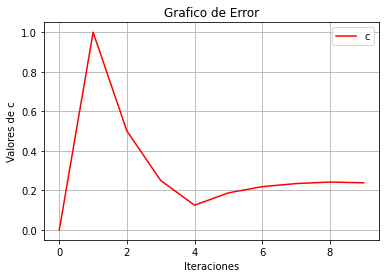

La raíz es:  0.23662185668945312
Se halló la raíz en la iteración N° 19 con una tolerancia =  1e-05
Salió del bucle


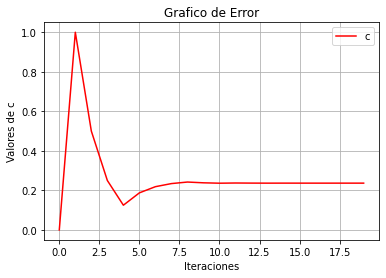

La raíz es:  0.23662236332893372
Se halló la raíz en la iteración N° 26 con una tolerancia =  1e-07
Salió del bucle


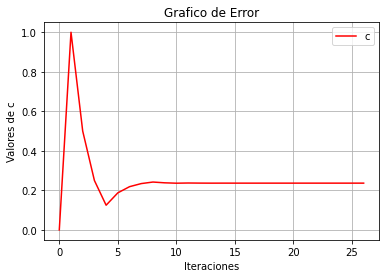

La raíz es:  0.23662234542689475
Se halló la raíz en la iteración N° 42 con una tolerancia =  1e-12
Salió del bucle


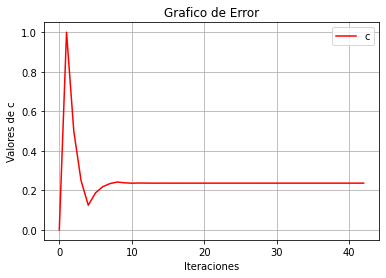

In [8]:
# Método Bisección- RAIZ 1
 # Tol= 10e-2
MetodoBiseccion(funcion= f4, a=0, b=2, tol=1e-2)
  # Tol= 10e-2
MetodoBiseccion(funcion= f4, a=0, b=2, tol=1e-5)
  # Tol= 10e-2
MetodoBiseccion(funcion= f4, a=0, b=2, tol=1e-7)
  # Tol= 10e-2
MetodoBiseccion(funcion= f4, a=0, b=2, tol=1e-12)

In [25]:
# Metodo Bisección- RAIZ 2
  # Tol= 10e-2
MetodoBiseccion(funcion= f4, a=5, b=9, tol=1e-2)
  # Tol= 10e-2
MetodoBiseccion(funcion= f4, a=5, b=9, tol=1e-5)
  # Tol= 10e-2
MetodoBiseccion(funcion= f4, a=5, b=9, tol=1e-7)
  # Tol= 10e-2
MetodoBiseccion(funcion= f4, a=5, b=9, tol=1e-12)

La raíz es:  7.23828125
Se halló la raíz en la iteración N° 10
Salió del bucle
La raíz es:  7.240932464599609
Se halló la raíz en la iteración N° 20
Salió del bucle
La raíz es:  7.240931063890457
Se halló la raíz en la iteración N° 27
Salió del bucle
La raíz es:  7.24093105782822
Se halló la raíz en la iteración N° 43
Salió del bucle


### 4-b) Metodo Punto Fijo

In [69]:
def funcion_g(x):
    return 25/(-8*x**3+44*x**2+90*x+82)

Nuevamente, este método reconoce solo 1 raíz, la otra solo aparece si pasa como parámetro p0 con un mayor número de cifras exactas que la tolerancia


In [70]:
# Método Punto Fijo- RAIZ 1
#El método no logra identificar la segunda raiz, sino que vuelve a devolver la anterior independientemente del p0 que se pase por parámetro
  # Tol= 10e-2
MetodoPuntoFijo(p0=6, tol=10e-2)
  # Tol= 10e-5
MetodoPuntoFijo(p0=6, tol=10e-5)
  # Tol= 10e-7
MetodoPuntoFijo(p0=6, tol=10e-7)
  # Tol= 10e-12
MetodoPuntoFijo(p0=6, tol=10e-12)

El valor de p es: 0.22448
Tolerancia: 0.1  Iteraciones: 3
La función g evaluada en p es:  0.2396255190162467
El valor de p es: 0.23663
Tolerancia: 0.0001  Iteraciones: 8
La función g evaluada en p es:  0.2366196885436748
El valor de p es: 0.23662
Tolerancia: 1e-06  Iteraciones: 11
La función g evaluada en p es:  0.23662238459066967
El valor de p es: 0.23662
Tolerancia: 1e-11  Iteraciones: 20
La función g evaluada en p es:  0.2366223454271629


In [76]:
# Método Punto Fijo- RAIZ 2
#El método no logra identificar la segunda raiz, sino que vuelve a devolver la anterior independientemente del p0 que se pase por parámetro
  # Tol= 10e-2
MetodoPuntoFijo(p0=7.2409, tol=10e-2)
  # Tol= 10e-5
MetodoPuntoFijo(p0=7.240931, tol=10e-5)
  # Tol= 10e-7
MetodoPuntoFijo(p0=6, tol=10e-7)
  # Tol= 10e-12
MetodoPuntoFijo(p0=6, tol=10e-12)

El valor de p es: 7.20650
Tolerancia: 0.1  Iteraciones: 1
La función g evaluada en p es:  1.1580900598428707
El valor de p es: 7.24087
Tolerancia: 0.0001  Iteraciones: 1
La función g evaluada en p es:  7.169880682098786
El valor de p es: 0.23662
Tolerancia: 1e-06  Iteraciones: 11
La función g evaluada en p es:  0.23662238459066967
El valor de p es: 0.23662
Tolerancia: 1e-11  Iteraciones: 20
La función g evaluada en p es:  0.2366223454271629


### 4-c) Método Newton

In [ ]:
# Método Newton- RAIZ 1
  # Tol= 10e-2
MetodoNewton(funcion=f4, p0=0, tol=10e-2)
  # Tol= 10e-5
MetodoNewton(funcion=f4, p0=0, tol=10e-5)
  # Tol= 10e-7
MetodoNewton(funcion=f4, p0=0, tol=10e-7)
  # Tol= 10e-12
MetodoNewton(funcion=f4, p0=0, tol=10e-12)

In [ ]:
# Método Newton- RAIZ 2
  # Tol= 10e-2
MetodoNewton(funcion=f4, p0=6, tol=10e-2)
  # Tol= 10e-5
MetodoNewton(funcion=f4, p0=6, tol=10e-5)
  # Tol= 10e-7
MetodoNewton(funcion=f4, p0=6, tol=10e-7)
  # Tol= 10e-12
MetodoNewton(funcion=f4, p0=6, tol=10e-12)

# Comparación de Iteraciones
La cantidad de iteraciones en el método de Bisección es mucho mayor que en los otros 2 (partiendo de un mismo valor inicial elegido por la información visual  del gráfico de cada función), lo cual implica un mayor costo computaconal, pero los resultados que se obtienen son confiables y completos (permite hallar todas las raíces, o la cantidad que se desee).
El método de punto fijo llega a la raíz con una menor cantidad de iteraciones pero es capaz de buscar solo una, y luego puede reconocer las demás si se pasan al método como parámetro inicial.
El método Newton permite hallar las distintas raíces en unas pocas iteraciones.